<a href="https://colab.research.google.com/github/Miller76lite/GEOL558/blob/main/Regression_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Dataset Review
###Facies logs from nine wells from the Council Grove gas reservoir located in Kansas
###Facies are studied from core samples in every half foot and matched with logging data in well location. Feature variables include five from wireline log measurements and two geologic constraining variables that are derived from geologic knowledge. For more detail refer here

###The seven variables are:

#####GR: this wireline logging tools measure gamma emission
#####ILD_log10: this is resistivity measurement
#####PE: photoelectric effect log
#####DeltaPHI: Phi is a porosity index in petrophysics.
#####PNHIND: Average of neutron and density log.
#####NM_M:nonmarine-marine indicator
#####RELPOS: relative position
###The nine discrete facies (classes of rocks) are:

#####SS: Nonmarine sandstone
#####CSiS: Nonmarine coarse siltstone
#####FSiS: Nonmarine fine siltstone
#####SiSH: Marine siltstone and shale
#####MS: Mudstone (limestone)
#####WS: Wackestone (limestone)
#####D: Dolomite
#####PS: Packstone-grainstone (limestone)
#####BS: Phylloid-algal bafflestone (limestone)

###Using this data, I would like to see if we can we predict the photoelectric effect (PE) of a rock sample based on its other measured properties, such as GR, ILD_log10, and porosity (DeltaPHI or PHIND).




In [1]:
!pip install seaborn==0.13.2

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

###Bring Data from github to colab

In [3]:
Data = pd.read_csv('https://raw.githubusercontent.com/Miller76lite/GEOL558/main/facies_data.csv')

###Start of EDA
##### This EDA shows shape of the data set, includes brief cleaning of the data and shows pair plots, correlation heat map and CDF plots.

In [4]:
Data.shape

(3232, 11)

In [5]:
Data.describe()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000
mean,4.422030,2875.824567,66.135769,0.642719,3.559642,13.483213,3.725014,1.498453,0.520287
std,2.504243,131.006274,30.854826,0.241845,5.228948,7.698980,0.896152,0.500075,0.286792
min,1.000000,2573.500000,13.250000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.010000
25%,2.000000,2791.000000,46.918750,0.492750,1.163750,8.346750,3.100000,1.000000,0.273000
50%,4.000000,2893.500000,65.721500,0.624437,3.500000,12.150000,3.551500,1.000000,0.526000
75%,6.000000,2980.000000,79.626250,0.812735,6.432500,16.453750,4.300000,2.000000,0.767250
max,9.000000,3122.500000,361.150000,1.480000,18.600000,84.400000,8.094000,2.000000,1.000000


In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3232 entries, 0 to 3231
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Facies     3232 non-null   int64  
 1   Formation  3232 non-null   object 
 2   Well Name  3232 non-null   object 
 3   Depth      3232 non-null   float64
 4   GR         3232 non-null   float64
 5   ILD_log10  3232 non-null   float64
 6   DeltaPHI   3232 non-null   float64
 7   PHIND      3232 non-null   float64
 8   PE         3232 non-null   float64
 9   NM_M       3232 non-null   int64  
 10  RELPOS     3232 non-null   float64
dtypes: float64(7), int64(2), object(2)
memory usage: 277.9+ KB


As we can see from the data information, we have 3232 entries with no missing data. We will clean the data of un wanted variables and outliers below.

###Removing Unneeded Data:
#####Irrelevant or redundant data can hinder model performance and interpretability. By selectively removing features that are not directly related to the target variable or the chosen predictors, we can streamline the analysis and improve model efficiency. This ensures that the model focuses on the most relevant information for making predictions. Below we will remove the columns labled Facies, Formation, Well Name, and Depth.

In [7]:
data_cleaned = Data.drop(columns=['Facies', 'Formation', 'Well Name', 'Depth'])

# Print the cleaned data's information
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3232 entries, 0 to 3231
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   GR         3232 non-null   float64
 1   ILD_log10  3232 non-null   float64
 2   DeltaPHI   3232 non-null   float64
 3   PHIND      3232 non-null   float64
 4   PE         3232 non-null   float64
 5   NM_M       3232 non-null   int64  
 6   RELPOS     3232 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 176.9 KB


###Handling Missing Values:
#####Missing data is a common issue in datasets and can lead to biased results if not addressed properly. Imputation techniques, such as replacing missing values with the mean or median, can help preserve information and ensure model compatibility. Alternatively, rows or columns with excessive missing data may be removed, but with careful consideration of potential information loss.

In [8]:
imputer = SimpleImputer(strategy='mean')  # Replace with 'median' or other strategy if needed
numerical_features = data_cleaned.select_dtypes(include=np.number).columns
data_cleaned[numerical_features] = imputer.fit_transform(data_cleaned[numerical_features])

# Print the updated data's information
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3232 entries, 0 to 3231
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   GR         3232 non-null   float64
 1   ILD_log10  3232 non-null   float64
 2   DeltaPHI   3232 non-null   float64
 3   PHIND      3232 non-null   float64
 4   PE         3232 non-null   float64
 5   NM_M       3232 non-null   float64
 6   RELPOS     3232 non-null   float64
dtypes: float64(7)
memory usage: 176.9 KB


###Outlier Detection:
#####Outliers, or extreme data points, can significantly influence model training and lead to inaccurate predictions. Identifying and handling outliers is essential for building robust models. This may involve removing outliers, transforming the data to reduce their impact, or using algorithms less sensitive to extreme values. Careful investigation of the nature and cause of outliers is crucial before taking any action.

In [9]:
def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.clip(df[column], lower_bound, upper_bound)
    return df

# Apply to numerical features
numerical_features = data_cleaned.select_dtypes(include=np.number).columns
for feature in numerical_features:
    data_cleaned = handle_outliers_iqr(data_cleaned, feature)

# Print the updated data's information
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3232 entries, 0 to 3231
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   GR         3232 non-null   float64
 1   ILD_log10  3232 non-null   float64
 2   DeltaPHI   3232 non-null   float64
 3   PHIND      3232 non-null   float64
 4   PE         3232 non-null   float64
 5   NM_M       3232 non-null   float64
 6   RELPOS     3232 non-null   float64
dtypes: float64(7)
memory usage: 176.9 KB


###Redundant Feature Removal:
#####Highly correlated features can introduce multicollinearity, which can destabilize model training and hinder interpretation. By removing redundant features, we can simplify the model, improve interpretability, and avoid potential issues with overfitting. Correlation analysis and feature selection techniques can help identify and remove redundant features while retaining the most informative ones.

In [10]:
# Calculate correlation matrix
correlation_matrix = data_cleaned[numerical_features].corr()

# Set threshold for correlation
threshold = 0.95

# Find highly correlated features
highly_correlated = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated.add(colname)

# Remove highly correlated features
data_cleaned = data_cleaned.drop(columns=highly_correlated)

# Print the cleaned data's information
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3232 entries, 0 to 3231
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   GR         3232 non-null   float64
 1   ILD_log10  3232 non-null   float64
 2   DeltaPHI   3232 non-null   float64
 3   PHIND      3232 non-null   float64
 4   PE         3232 non-null   float64
 5   NM_M       3232 non-null   float64
 6   RELPOS     3232 non-null   float64
dtypes: float64(7)
memory usage: 176.9 KB


###Pair plots of each Compound

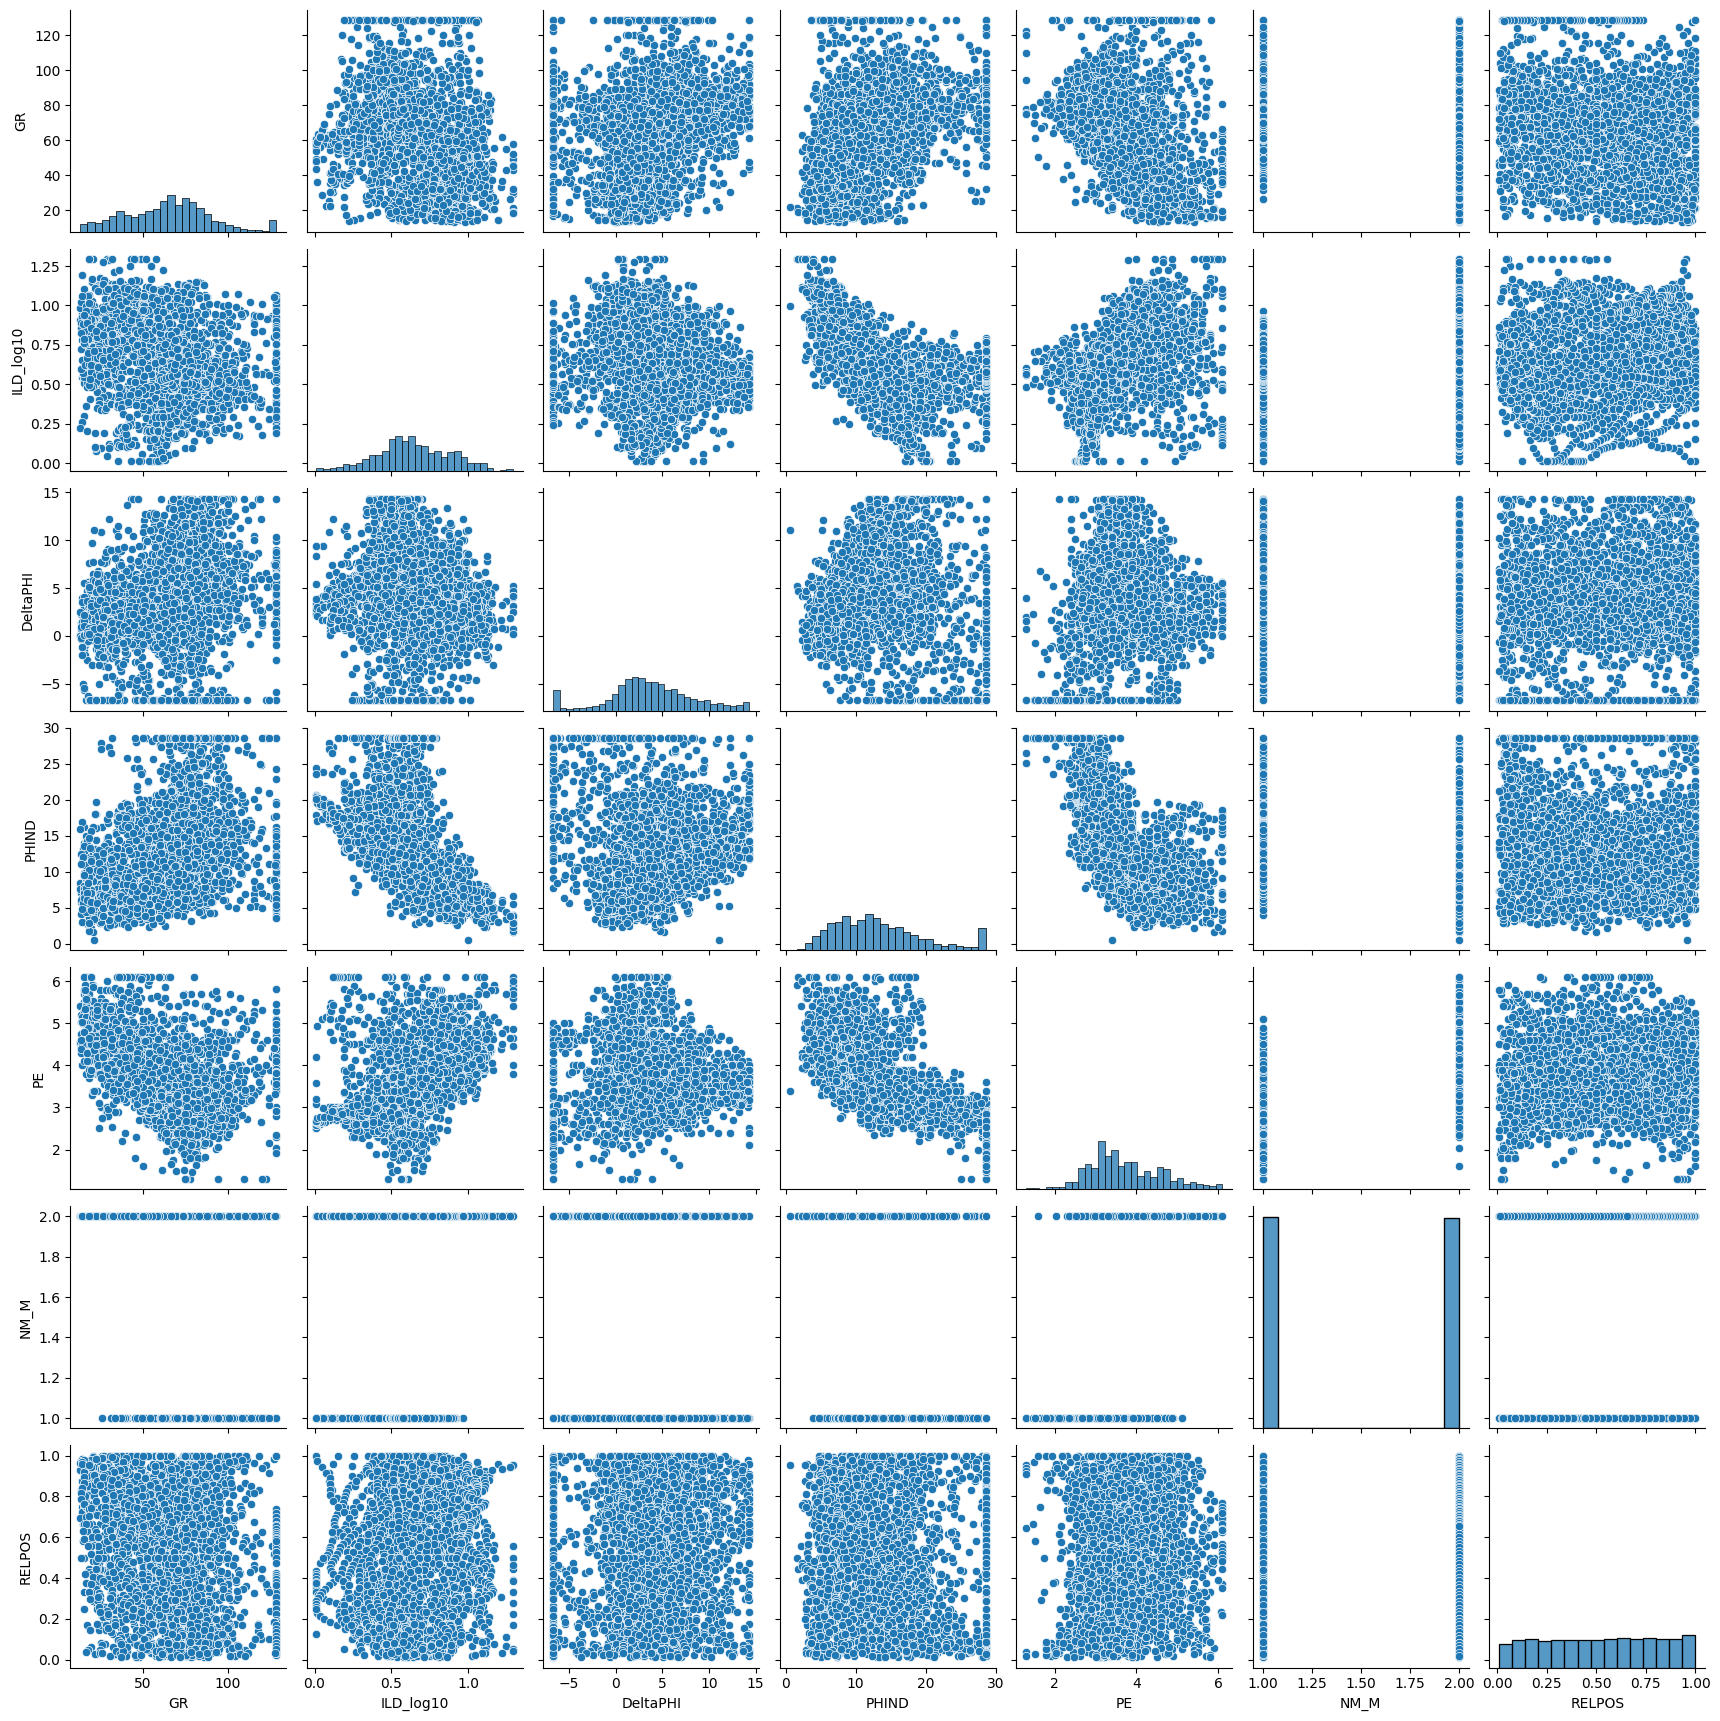

In [11]:
numeric_columns = data_cleaned.select_dtypes(include='number').columns
sns.pairplot(data_cleaned[numeric_columns])
plt.show()

In [12]:
correlation_matrix = data_cleaned.corr(numeric_only=True)

###Correlation Heat Map

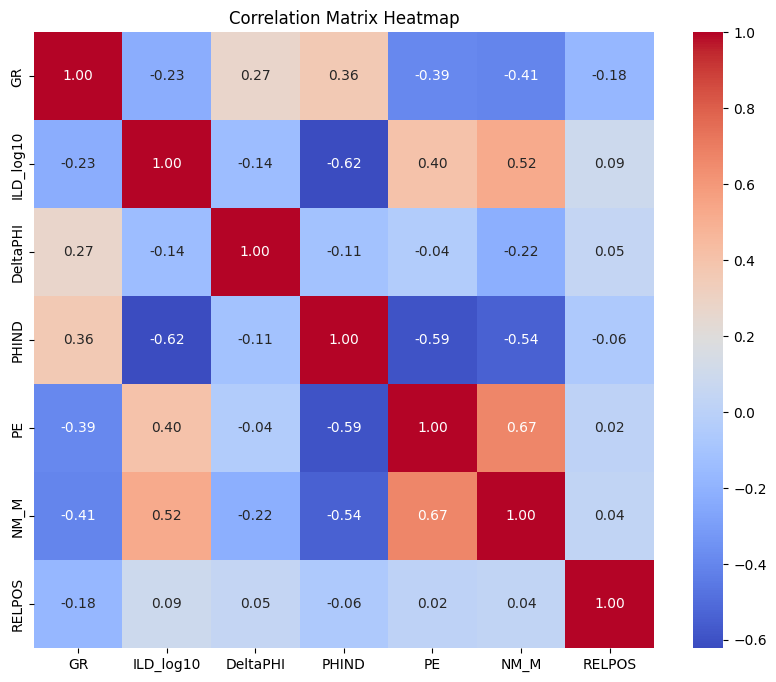

In [13]:
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

### ECDF Plots

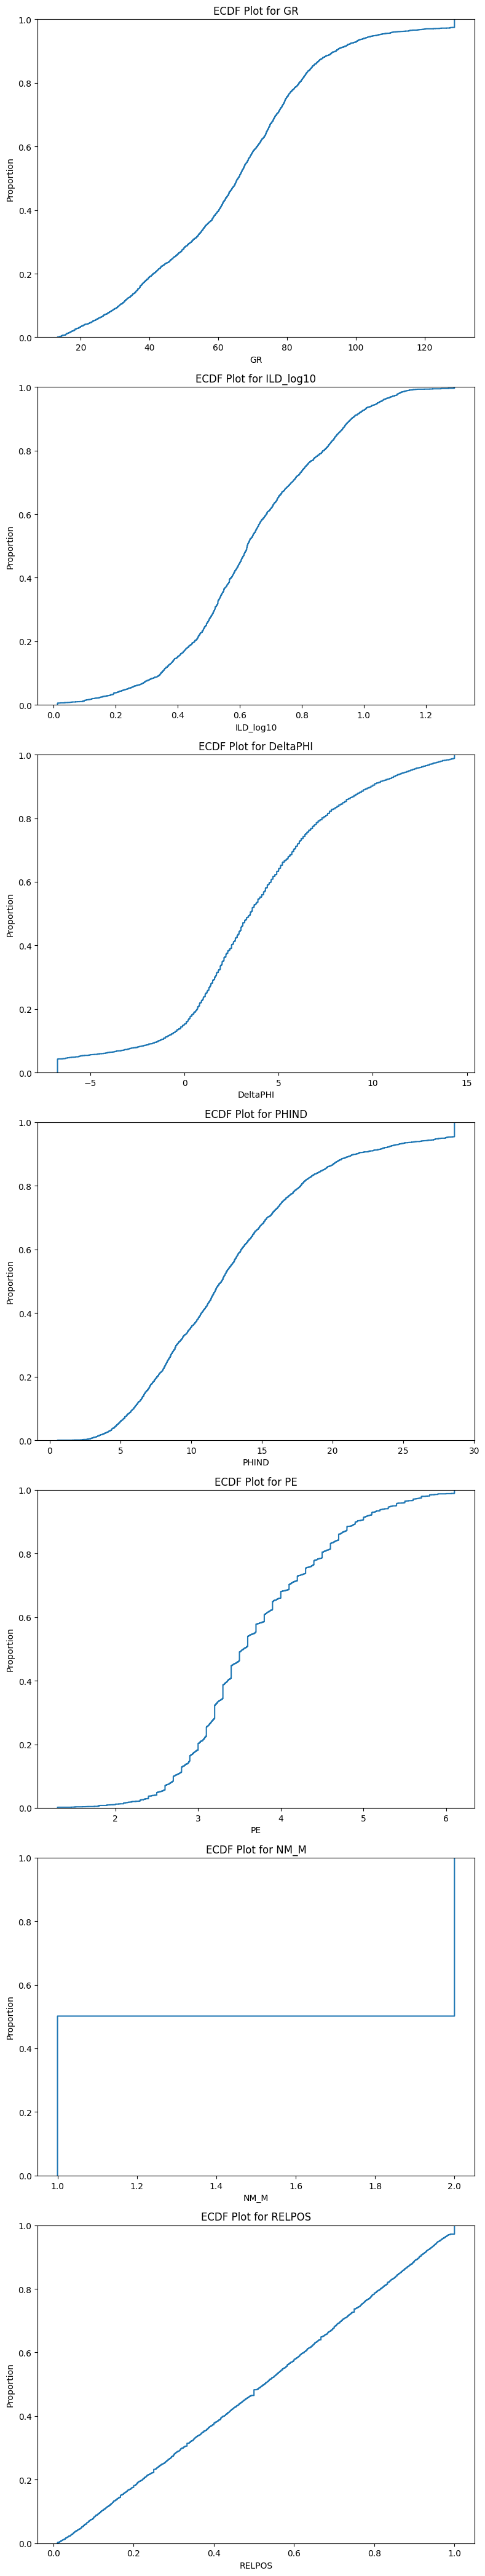

In [14]:
numeric_columns = data_cleaned.select_dtypes(include='number').columns
# Create ECDF plots for all numerical variables
fig, axes = plt.subplots(len(numeric_columns), 1, figsize=(8, 6 * len(numeric_columns))) # Create subplots

for i, column in enumerate(numeric_columns):
    sns.ecdfplot(data=data_cleaned, x=column, ax=axes[i])  # Plot ECDF on the subplot
    axes[i].set_title(f"ECDF Plot for {column}")  # Set title for each subplot

plt.tight_layout()  # Adjust subplot spacing to prevent overlap
plt.show()

As we can see from the EDA, there are not many visible correlations in the pair plots. This is further confirmed by the correlation heat map. The CDF plots show that some of the variables are normally distributed, while others are concentrated.